In [16]:
# Import Libraries and data
import pandas as pd


diabetes_df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv')
diabetes_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [17]:
nulls = diabetes_df.isnull().sum()
print(nulls)

diabetes_df = diabetes_df[(diabetes_df['BMI'] > 0) & (diabetes_df['Insulin'] > 0)]
diabetes_df.head()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
6,3,78,50,32,88,31.0,0.248,26,1
8,2,197,70,45,543,30.5,0.158,53,1
13,1,189,60,23,846,30.1,0.398,59,1


In [18]:
features_values = ['Glucose', 'Insulin', 'BMI', 'Age', 'Pregnancies']
#DiabetesPedigreeFunction

In [19]:
from sklearn.model_selection import train_test_split

X = diabetes_df[features_values]
y = diabetes_df['Outcome']

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (314, 5)
X_test shape: (79, 5)
y_train shape: (314,)
y_test shape: (79,)


In [20]:
from xgboost import XGBClassifier
# Train an XGBoost model
model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)



/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

In [21]:
from sklearn.metrics import classification_report


# Make predictions on the test set
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.83      0.86      0.84        56
           1       0.62      0.57      0.59        23

    accuracy                           0.77        79
   macro avg       0.72      0.71      0.72        79
weighted avg       0.77      0.77      0.77        79



In [22]:
from sklearn.model_selection import GridSearchCV


# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0]
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Retrieve the best parameters
best_params = grid_search.best_params_
print(f'Best parameters: {best_params}')



/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 3 folds for each of 240 candidates, totalling 720 fits
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:43] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsam

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:46] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:47] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.3s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:48] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:49] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:50] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.01, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsamp

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost


[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.3s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:53] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:54] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s[CV] END learning_rate=0.05, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.2s

[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:55] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.05, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:38:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=0.9; 

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.2s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.1, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; tota

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.1s[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s



/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=3, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=4, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=4, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.8; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=0.9; total time=   0.1s[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s



/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=50, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=0.9; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=6, n_estimators=300, subsample=1.0; total time=   0.2s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END learning_rate=0.2, max_depth=7, n_estimators=300, subsample=1.0; total time=   0.1s
Best parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300, 'subsample': 1.0}


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [23:39:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [108]:
best_model = XGBClassifier(learning_rate = 5.01, max_depth=5 , n_estimators= 50, subsample= 0.8)
best_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=5.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=50, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [109]:
# Train the model with the best parameters
#best_model = grid_search.best_estimator_

# Make predictions on the test set
y_pred = best_model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.88      0.88        56
           1       0.71      0.74      0.72        23

    accuracy                           0.84        79
   macro avg       0.80      0.81      0.80        79
weighted avg       0.84      0.84      0.84        79



In [213]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier  # or XGBRegressor for regression tasks


param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7],
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 1, 2, 5],
    'subsample': [0.7, 0.8, 0.9, 1.0],
    'colsample_bytree': [0.7, 0.8, 0.9, 1.0],
    'gamma': [0, 0.1, 0.2, 0.3],
    'min_child_weight': [1, 3, 5, 7]
}

# Initialize a RandomForest model
rf = RandomForestClassifier()

# Perform Randomized Search
random_search = RandomizedSearchCV(estimator=xgb, param_distributions=param_dist, n_iter=100, cv=5, n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters
print("Best Parameters:", random_search.best_params_)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:56] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.01, max_depth=4, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=6, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=2, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=2, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=2, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=2, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=2, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.8; total t

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total 

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=0.05, max_depth=3, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=50, subsample=0.8; total tim

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=0.8; total time=   0.0

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.7; tot

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:58] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0; total

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=5, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:13:59] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=5, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=5, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=5, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=5, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=7, min_child_weight=7, n_estimators=50, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.01, max_depth=5, min_child_weight=7, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.01, max_depth=6, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=100, subsample=0.7; tot

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:00] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.7; total time=  

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=2, max_depth=4, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=2, max_depth=4, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=5, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=1, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total t

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=50, subsample=1.0; total time= 

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=7, min_child_weight=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=1, max_depth=7, min_child_weight=7, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=1.0; total time=   0.0s

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=1, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV]

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.2s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.1, max_depth=4, min_child_weight=3, n_estimators=300, subsample=0.7; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.8; total

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=2, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=0.01, max_depth=5, min_child_weight=5, n_estimators=50, subsample=1.0; tot

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=7, min_child_weight=3, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.9; total time=   0.1s[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s

[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsam

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=0.01, max_depth=3, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=0.2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=0.2, max_depth=3, min_child_weight=7, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=3, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.1, max_depth=6, min_child_weight=1, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=2, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=3, n_estimators=50, subsample=0.8; total time=   0.

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=1, max_depth=7, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=0.01, max_depth=7, min_child_weight=7, n_estimators=100, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total 

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:05] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=5, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.2, max_depth=3, min_child_weight=3, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=0.2, max_depth=4, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.0; t

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=5, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=5, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0; total 

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0, learning_rate=5, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=5, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0, learning_rate=5, max_depth=4, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:06] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=0.05, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=50, subsample=0.9; t

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.1, max_depth=5, min_child_weight=1, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.1, learning_rate=2, max_depth=6, min_child_weight=7, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=2, max_depth=6, min_child_weight=1, n_estimators=100, subsample=1.0; total time

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=7, n_estimators=200, subsample=0.9; total time=

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.1, learning_rate=1, max_depth=3, min_child_weight=5, n_estimators=200, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.3, learning_rate=5, max_depth=7, min_child_weight=5, n_estimators=100, subsample=0.9; total time=

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.01, max_depth=7, min_child_weight=1, n_estimators=100, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.7;

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:07] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=2, max_depth=4, min_child_weight=1, n_estimators=200, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=1, max_depth=5, min_child_weight=1, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time=

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=2, max_depth=7, min_child_weight=1, n_estimators=200, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=1.0; tot

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=300, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.3, learning_rate=2, max_depth=3, min_child_weight=3, n_estimators=100, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.8; total 

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.8, gamma=0.1, learning_rate=0.05, max_depth=7, min_child_weight=7, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=3, n_estimators=100, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0.1, learning_rate=2, max_depth=4, min_child_weight=5, n_estimators=50, subsample=0.9; total time

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0, learning_rate=0.2, max_depth=6, min_child_weight=5, n_estimators=200, subsample=1.0; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0, learning_rate=5, max_depth=4, min_child_weight=3, n_estimators=100, subsample=0.8; total time=   0.0s
[C

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=5, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=5, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; total time=   0.0s
[CV] END colsample_bytree=0.9, gamma=0.2, learning_rate=5, max_depth=6, min_child_weight=3, n_estimators=200, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.2, learning_rate=0.05, max_depth=7, min_child_weight=1, n_estimators=50, subsample=0.7; tot

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=1.0, gamma=0.2, learning_rate=0.2, max_depth=5, min_child_weight=5, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s


/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=0.7, gamma=0.3, learning_rate=1, max_depth=4, min_child_weight=5, n_estimators=300, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.2, learning_rate=0.05, max_depth=3, min_child_weight=1, n_estimators=300, subsample=0.8;

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.0s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=1.0, gamma=0, learning_rate=0.05, max_depth=4, min_child_weight=1, n_estimators=50, subsample=0.9; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=   0.1s
[CV] END colsample_bytree=0.8, gamma=0.3, learning_rate=2, max_depth=5, min_child_weight=1, n_estimators=100, subsample=0.7; total time=

/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost/core.py:158: UserWarning: [00:14:10] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/home/codespace/.python/current/lib/python3.12/site-packages/xgboost

In [317]:
random__model = XGBClassifier(learning_rate = 1.05, max_depth=4 , n_estimators= 100, subsample= 0.8, min_child_weight=3, colsample_bytree=0.7)
#random__model = XGBClassifier(learning_rate = 5.5, max_depth=5, n_estimators= 450, subsample= 1, min_child_weight=5, colsample_bytree=0.9, gamma=0.9)

random__model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=1.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_leaves=None,
              min_child_weight=3, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [318]:
y_pred = random__model.predict(X_test)

report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.89      0.89      0.89        56
           1       0.74      0.74      0.74        23

    accuracy                           0.85        79
   macro avg       0.82      0.82      0.82        79
weighted avg       0.85      0.85      0.85        79



NameError: name 'plt' is not defined

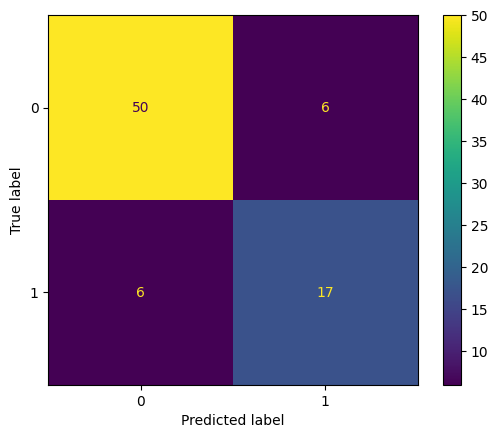

In [320]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)
# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

# Show plot
plt.show()